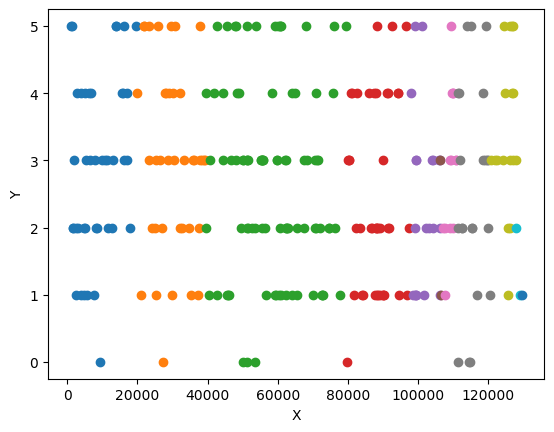

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Чтение данных из файла
data = pd.read_csv('a.csv',sep = ';')

# Функция для вычисления расстояния между двумя точками
def distance(p1, p2):
    return np.sqrt((p1[0] - p2[0])*2 + (p1[1] - p2[1])*2)

# Задание параметра r
r = 500

# Создание списка кластеров, изначально каждая точка - отдельный кластер
clusters = [[(point[0], point[1])] for point in data.values]

# Функция для объединения кластеров
def merge_clusters(c1, c2):
    return c1 + c2

# Реализация метода
while len(clusters) > 1:
    min_dist = np.inf
    merge_indices = None
    for i in range(len(clusters)):
        for j in range(i+1, len(clusters)):
            for point1 in clusters[i]:
                for point2 in clusters[j]:
                    dist = distance(point1, point2)
                    if dist < min_dist:
                        min_dist = dist
                        merge_indices = (i, j)
    if min_dist <= r:
        clusters[merge_indices[0]] = merge_clusters(clusters[merge_indices[0]], clusters[merge_indices[1]])
        del clusters[merge_indices[1]]
    else:
        break

# Визуализация
for i, cluster in enumerate(clusters):
    cluster = np.array(cluster)
    plt.scatter(cluster[:, 0], cluster[:, 1], label='Cluster {}'.format(i+1))

plt.xlabel('X')
plt.ylabel('Y')
plt.show()
